In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
mat_data = pd.read_csv("D:\Jupiter_data\student-mat.csv")

Начнем с исследования датасета, наличия в нем пропусков и т.д.

In [ ]:
np.shape(mat_data)

(395, 33)

In [ ]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Проверим на наличие дубликатов в датасете

In [ ]:
for i in mat_data.duplicated():
    if i==True:
        print("Duplicates exist")

Разделим признаки в датасете на числовые (в том числе и ранговые) и на категориальные

In [ ]:
cat_columns = [i for i in mat_data if mat_data[i].dtype.name == "object"]
num_columns = [i for i in mat_data if np.issubdtype(mat_data[i].dtype, np.number)]

Покажем гистограммы численных признаков

In [ ]:
mat_data["sex"]

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

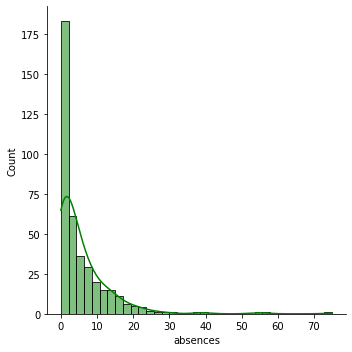

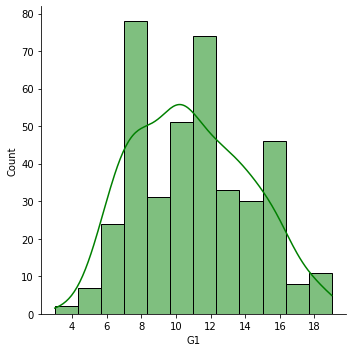

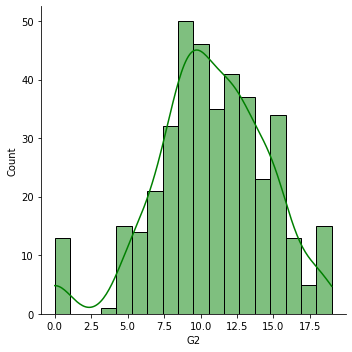

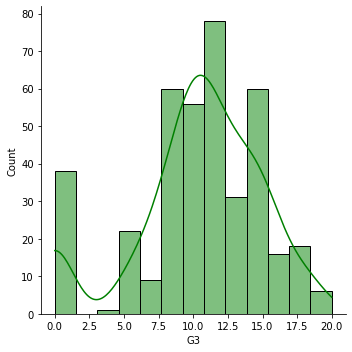

In [ ]:
num_col = ["absences", "G1", "G2", "G3"]
for i in num_col:
    sns.displot(data =mat_data, x=i, color="green", kde=True)

В данных оценок G2, G3 - нулевые значения - значения отчисленных студентов, причина отчисления может быть разной, например, ученик решил пойти на сварщика после 9-го класса или решил сменить школу.
Исключу их из рассмотрения, когда буду рассматривать оценки G3, G2.

В данном анализе буду исследовать утверждение, что интеллект матери определяет интеллект ребенка. Ссылку на научное исследование скинуть не могу, но в интернете полно статей на эту тему:
https://www.adme.ru/zhizn-semya/10-nasledstvennyh-chert-kotorye-my-peredaem-detyam-mamy-umnyh-synovej-mogut-soboj-gorditsya-1932865
https://rg.ru/2016/09/20/uchenye-uroven-intellekta-zavisit-ot-materi.html
В своем исследовании я постараюсь дать наиболее точную оценку влияния материнского интеллекта (подразумеваем, что уровень образования и интеллект имеют положительную корреляцию, так как данных об уровне интеллекта матери не дано) на успеваемость ребенка в разные периоды обучения (будь то начальная, средняя или старшая школы)

Разделим студентов на 5 групп по количеству времени пропусков
1-ая группа - [0-5] 
2-ая - [6-10]
3-я - [11-15]
4-ая - [16-25]
5-ая - [26-inf]

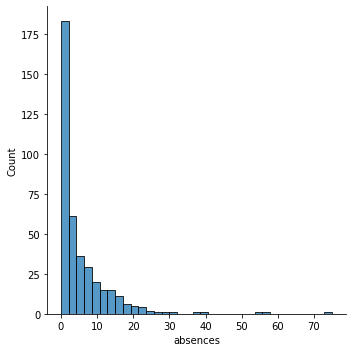

In [ ]:
sns.displot(mat_data["absences"])

In [ ]:
mat_data["absence_type"] = np.where(mat_data["absences"] < 6, 1,
                                   np.where(mat_data["absences"] < 11, 2,
                                           np.where(mat_data["absences"] < 16, 3,
                                                   np.where(mat_data["absences"] < 26, 4, 5))))

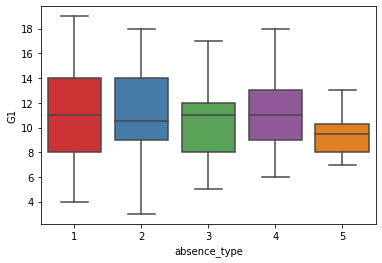

In [ ]:
sns.boxplot(data=mat_data, x="absence_type", y="G1", palette="Set1")

In [ ]:
data_for_G3 = mat_data[mat_data["G3"] != 0]
data_for_G2 = mat_data[mat_data["G2"] != 0]

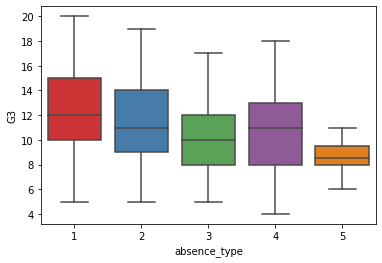

In [ ]:
sns.boxplot(data=data_for_G3, x="absence_type", y="G3", palette="Set1")

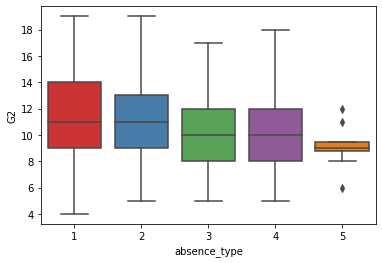

In [ ]:
sns.boxplot(data=data_for_G2, x="absence_type", y="G2", palette="Set1")

In [ ]:
np.unique(mat_data["Mjob"])

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [ ]:
romantic
Walc
studytime
schoolsup 
famsup 

NameError: name 'romantic' is not defined

In [ ]:
sns.boxplot(data=data_for_G3, x="romantic", y="G3", palette="Set1")

In [ ]:
Фактор наличия романтических отношений сказывается на G3

In [ ]:
sns.boxplot(data=data_for_G3, x="Walc", y="G3", palette="Set1")

In [ ]:
Отмечена негативная тенденция, фактор Walc оказывает влияние на G3

SyntaxError: invalid syntax (<ipython-input-166-ff7a9933c892>, line 1)

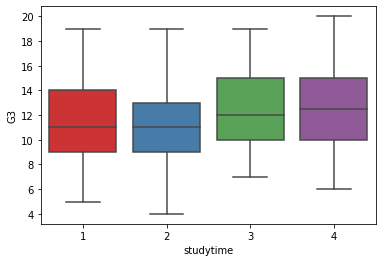

In [ ]:
sns.boxplot(data=data_for_G3, x="studytime", y="G3", palette="Set1")

In [ ]:
Видим положитеьную тенденцию, что говорит о том, что влияние на оценку фактор studytime оказывает

SyntaxError: invalid syntax (<ipython-input-168-a8d167e5420f>, line 1)

In [ ]:
sns.boxplot(data=data_for_G3, x="schoolsup", y="G3", palette="Set1")

Влияние schoolsup на оценку не 

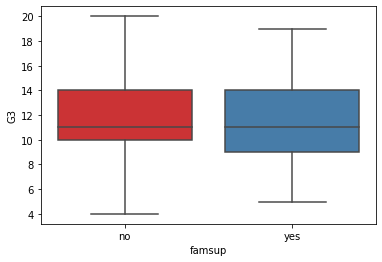

In [ ]:
sns.boxplot(data=data_for_G3, x="famsup", y="G3", palette="Set1")

Сделаем общий вывод по выборке, существенно ли образование матери, на успеваемость ребенка (дочери или сына), для этого разделим выборку по половому признаку и сгруппируем выборку таким образом, 

In [ ]:
male_data = mat_data[mat_data["sex"] == "M"]
female_data = mat_data[mat_data["sex"] == "F"]

min_size = np.min((len(male_data), len(female_data)))

male_data = male_data.iloc[0:min_size, :]
female_data = female_data.iloc[0:min_size, :]

G1md = male_data["G1"].values
G1fd = female_data["G1"].values

cont_matrix = np.hstack((G1md, G1fd))

np.unique()

Построим boxplot для результатов учеников, 

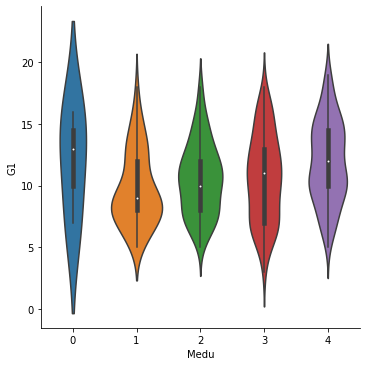

In [ ]:
sns.catplot(data=mat_data, x="Medu", y="G1", kind="violin")

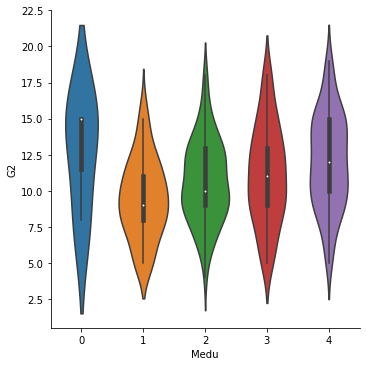

In [ ]:
sns.catplot(data=data_for_G2, x="Medu", y="G2", kind="violin")

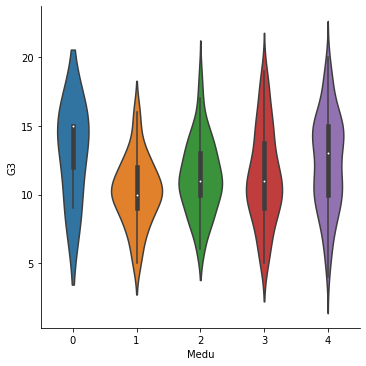

In [ ]:
sns.catplot(data=data_for_G3, x="Medu", y="G3", kind="violin")

In [ ]:
for i in np.unique(mat_data["Medu"]):
    print(np.shape(mat_data["G1"][mat_data["Medu"] == i]))

(3,)
(59,)
(103,)
(99,)
(131,)


In [ ]:
for i in np.unique(mat_data["Medu"]):
    print(np.shape(data_for_G2["G2"][data_for_G2["Medu"] == i]))

(3,)
(57,)
(100,)
(93,)
(129,)


Из полученных графиков можно сказать, что наблюдается рост успеваемости у учеников с уровнем образования матери, однако особняком, выбивающимся из общей картины, стоит случай, где образование у матери отсутствует, а оценка - хорошая, но это объясняется малым размером выборки с данным значением параметра образования матери - 3 человека.
Исключим из рассмотрения этот случай. 

In [ ]:
right_data = mat_data[mat_data["Medu"] != 0]
right_dataG3 = data_for_G3[data_for_G3["Medu"] != 0]
right_dataG2 = data_for_G2[data_for_G2["Medu"] != 0]

Проанализируем, насколько по-разному уровень интеллекта матери влияет на дочь и на сына
Результат в начальной школе

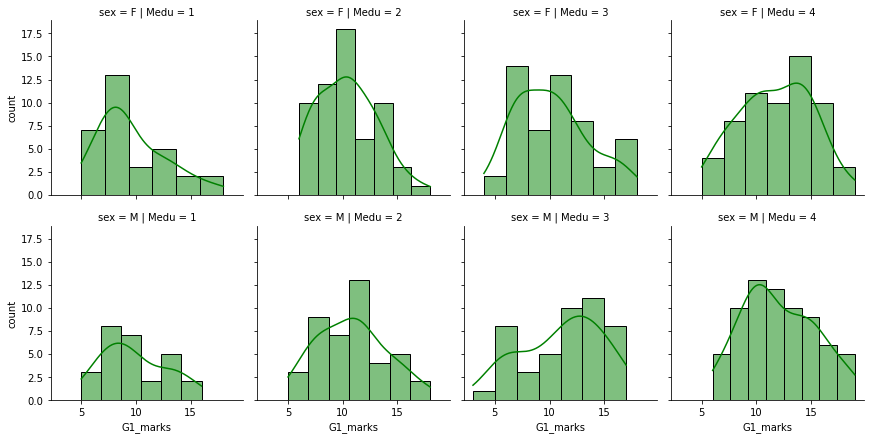

In [ ]:
g = sns.FacetGrid(data=right_data, row="sex", col = "Medu")
g.map_dataframe(sns.histplot, x="G1", kde=True, color="green")
g.set_axis_labels("G1_marks","count")

Из полученых результатов для начальной школы можно отметить, что мода G1 имеет тенденцию к увеличению при улучшении уровня образования матери. Стоит отметить также, что растет максимальное значение оценки G1.

Результат для средней школы

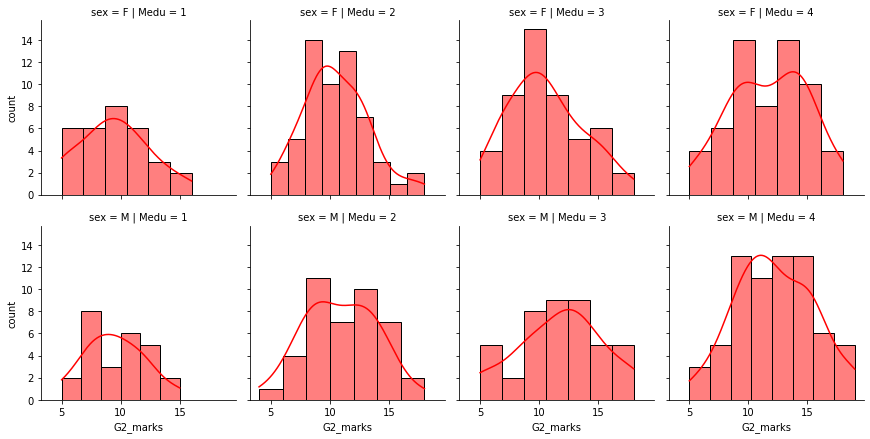

In [ ]:
g = sns.FacetGrid(data=right_dataG2, row="sex", col = "Medu")
g.map_dataframe(sns.histplot, x="G2", kde=True, color="red")
g.set_axis_labels("G2_marks","count")

Модальное значение оценки G2 то же смещается, как и в случае с начальными классами, правда в данном случае рост не настолько большой. Однако максимальное значение G2 растет, с уровнем образования матери. Различия между мальчиками и девочками несущественны.

Результат в старшей школе

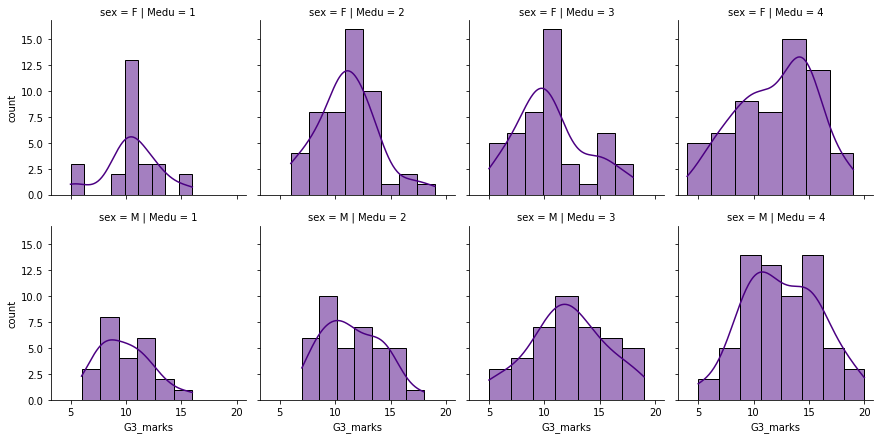

In [ ]:
g = sns.FacetGrid(data=right_dataG3, row="sex", col = "Medu")
g.map_dataframe(sns.histplot, x="G3", kde=True, color="indigo")
g.set_axis_labels("G3_marks","count")

Аналогичная ситуация, наблюдается рост модального и максимального значения оценки.

Для большей справедливости оценки влияния уровня образования матери на интеллект ребенка уровня снизим влияние прочих факторов путем создания подвыборок с одинаковыми следующими параметрами:
absence_type
Walc
studytime


In [ ]:
mat_data["studytime"]

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [ ]:
mat_data["study_typeG1"] = np.where(mat_data["G1"] < 8, 1,
                                   np.where(mat_data["G1"] < 12, 2,
                                           np.where(mat_data["G1"] < 16, 3, 4)))

In [ ]:
mat_data["study_typeG2"] = np.where(mat_data["G2"] < 8, 1,
                                   np.where(mat_data["G2"] < 12, 2,
                                           np.where(mat_data["G2"] < 16, 3, 4)))

In [ ]:
mat_data["study_typeG3"] = np.where(mat_data["G3"] < 8, 1,
                                   np.where(mat_data["G3"] < 12, 2,
                                           np.where(mat_data["G3"] < 16, 3, 4)))

In [ ]:
a1 = mat_data[(mat_data["absence_type"] == 1) & (mat_data["Medu"] < 3) & (mat_data["Walc"] < 3) & (mat_data["studytime"] <3)]

In [ ]:
a2 = mat_data[(mat_data["absence_type"] == 1) & (2 < mat_data["Medu"]) & ( mat_data["Medu"] < 5) &(mat_data["Walc"] < 3) & (mat_data["studytime"] <3)]

In [ ]:
sns.boxplot(data=a1, x=)

In [ ]:
b2 = np.array([a2.loc[0:55, "G1"].median(), a2.loc[0:32, "G1"].mean()])
b1 = np.array([a1["G1"].median(), a1["G1"].mean()])
print(b1)
res = np.column_stack((b1, b2))
res

[9.         9.89090909]


array([[ 9.        , 12.        ],
       [ 9.89090909, 12.33333333]])

In [ ]:
a2val = a2["G1"].values[0:55]

In [ ]:
a1val = a1["G1"].values[0:55]

In [ ]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

odds, pval = fisher_exact(res)

print("Вероятность того, что мы случайно увидим это или даже более несбалансированное соотношение, составляет около {}%".format(pval * 100))
print("Таким образом приходим к заключению, что уровень образования матери имеет положительную корреляцию с успеваемостью ребенка")



Вероятность того, что мы случайно увидим это или даже более несбалансированное соотношение, составляет около 100.0%
Таким образом приходим к заключению, что уровень образования матери имеет положительную корреляцию с успеваемостью ребенка


Проверим с использованием критерия хи квадрат велика ли разность между успеваемостью студентов, для этого добавили ранее параметр study_typeG1 = 1, 2, 3, 4, где 4 - это от 17 баллов, 3 - от 12 до 16, 2 - от 7 до 11, 1 - до 7 баллов за G1

In [ ]:
def amount_of_students(data, feature):
    amount_of_stud_gr = []
    for i in np.unique(data[feature]):
        odessa = np.shape(data[feature][data[feature] == i])[0]  
        amount_of_stud_gr.append(odessa)
    return amount_of_stud_gr


In [ ]:
group1 = amount_of_students(a1, "study_typeG1")
group2 = amount_of_students(a2, "study_typeG1")

In [ ]:
np.column_stack((group1, group2))

array([[11, 12],
       [27, 19],
       [14, 21],
       [ 3, 11]])

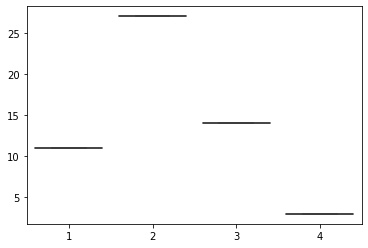

In [ ]:
sns.boxplot(y=group1, x=[1, 2, 3, 4])

In [ ]:
from scipy.stats import chisquare

alpha = 0.05
min_a2, min_a1  = min(a2val), min(a1val)
max_a2, max_a1 = max(a2val), max(a1val)
mean_a2, mean_a1 = np.mean(a2val), np.mean(a1val)
med_a2, med_a1 = np.median(a2val), np.median(a1val)


cont_matrix = np.column_stack((group1, group2))
chi2_contingency(cont_matrix)



(6.895532790191176,
 0.07530309694916523,
 3,
 array([[10.72033898, 12.27966102],
        [21.44067797, 24.55932203],
        [16.31355932, 18.68644068],
        [ 6.52542373,  7.47457627]]))

Так как pval = 0.075 > alpha = 0.05, то нулевая гипотеза об отсутствии различия между выборками должна быть отклонена